PROGETTO DATA SCIENCE DI FABRIZIO GIACOPPO


DATASET UTILIZZATO: House Sales in King County, USA

VARIABILE TARGET: PRICE

In [3]:
#importo le librerie che mi serviranno all'interno del progetto
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np
import sklearn as sk

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import ElasticNet


In [4]:
#import data
#df= pd.read_csv("C:/Users/giacofa1/Documents/Progetto Fabrizio/Progetto_Fabrizio/kc_house_data.csv")
df= pd.read_csv("kc_house_data.csv")

In [3]:
#print numero righe e colonne, nome delle colonne e stampo le prime righe del dataset
print("numero di righe e colonne: ", df.shape)
print(df.columns)
df.head()

numero di righe e colonne:  (21613, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#visualizzo valori nulli
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Nel caso in cui il dataset avesse avuto dei valori nulli avrei potuto scegliere diverse soluzioni per rimediare al problema:
- eliminare le righe ( scelta che avrei considerato solo nel caso in cui i null sarebbero stati sicuramente pochi)
- per le variabili numeriche avrei potuto assegnare ai null o la media o la mediana
- per le variabili categoriche nominali avrei potuto assegnare ai null i valori con maggior frequenza
- per le variabili categoriche ordinali avrei potuto codificarli in numeri e assegnare ai null la mediana.

In [5]:
#Data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
#cambio la variabile date da object a date
df['date'] = pd.to_datetime(df['date'])
#df= df.drop(['id'], axis = 1)



In [7]:
print(df.dtypes)
df.head()

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#visualizzo n. di righe e colonne
print(df.shape)
df.describe()

(21613, 21)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


ANALISI VARIABILE TARGET: PRICE

In [9]:
print(df.price.describe())

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


Skew is:  4.024069144684712


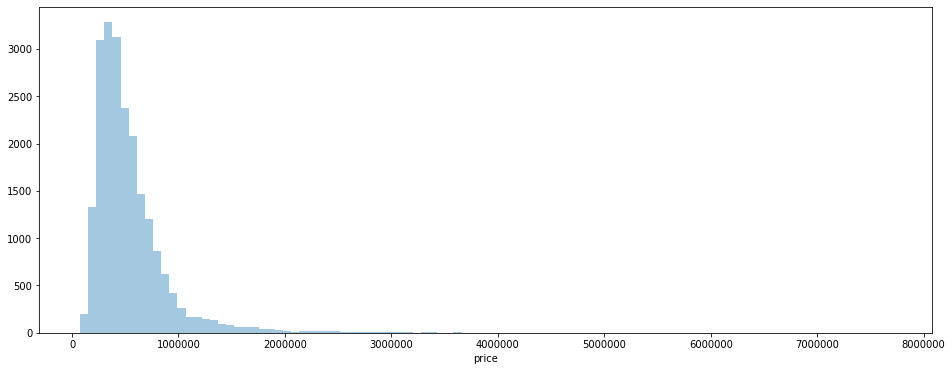

In [32]:
#visualizzo sul grafico la distribuzione della variabile target e stampo il valore di asimetria
plt.figure(figsize=(16, 6))
sns.distplot(df['price'], bins=100, kde=False);
print("Skew is: ", df.price.skew())

Dal grafico si può notare che la distriuzione ha un'asimettria positiva, ovvero la coda più lunga si trova a destra del valore massimo centrale.
Ora provo a plottare 2 tipi di grafici: il primo replica quello precedentemente stampato, mentre nel secondo trasformo la variabile in una logaritmica per cercare di normalizzare la sua distribuzione.


Text(0.5, 0, 'log(price)')

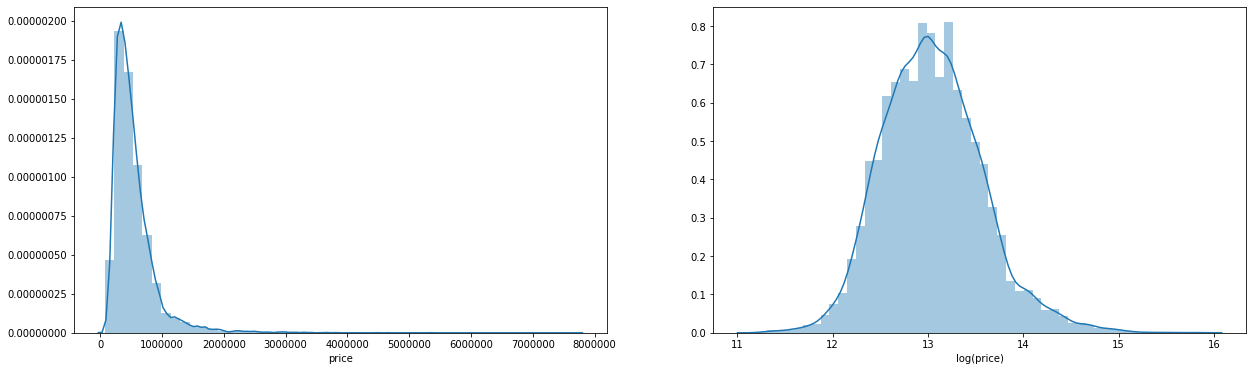

In [11]:

fig, axes = plt.subplots(1,2, figsize=(21,6))

sns.distplot(df['price'], ax=axes[0])
sns.distplot(np.log(df['price']), ax=axes[1])

axes[1].set_xlabel('log(price)')


Si può notare come la distribuzione cambi. Nel secondo grafico si può vedere come l'assimetria si sia notevolmente ridotta.
Decido quindi di trasformare la variabile target in una logaritmica, ricordando poi alla fine di fare il procedimento inverso per avere la stampa del risultato finale.
Stampo, inoltre, il valore di asimmetria per capire quanto esso si sia ridotto.

In [12]:
price_log = np.log(df['price'])
print("Skew is: ", price_log.skew())

Skew is:  0.42807247557592526


ANALISI DELLE FEATURES

Printo ora una tabella di correlazione tra tutte le variabili del dataset

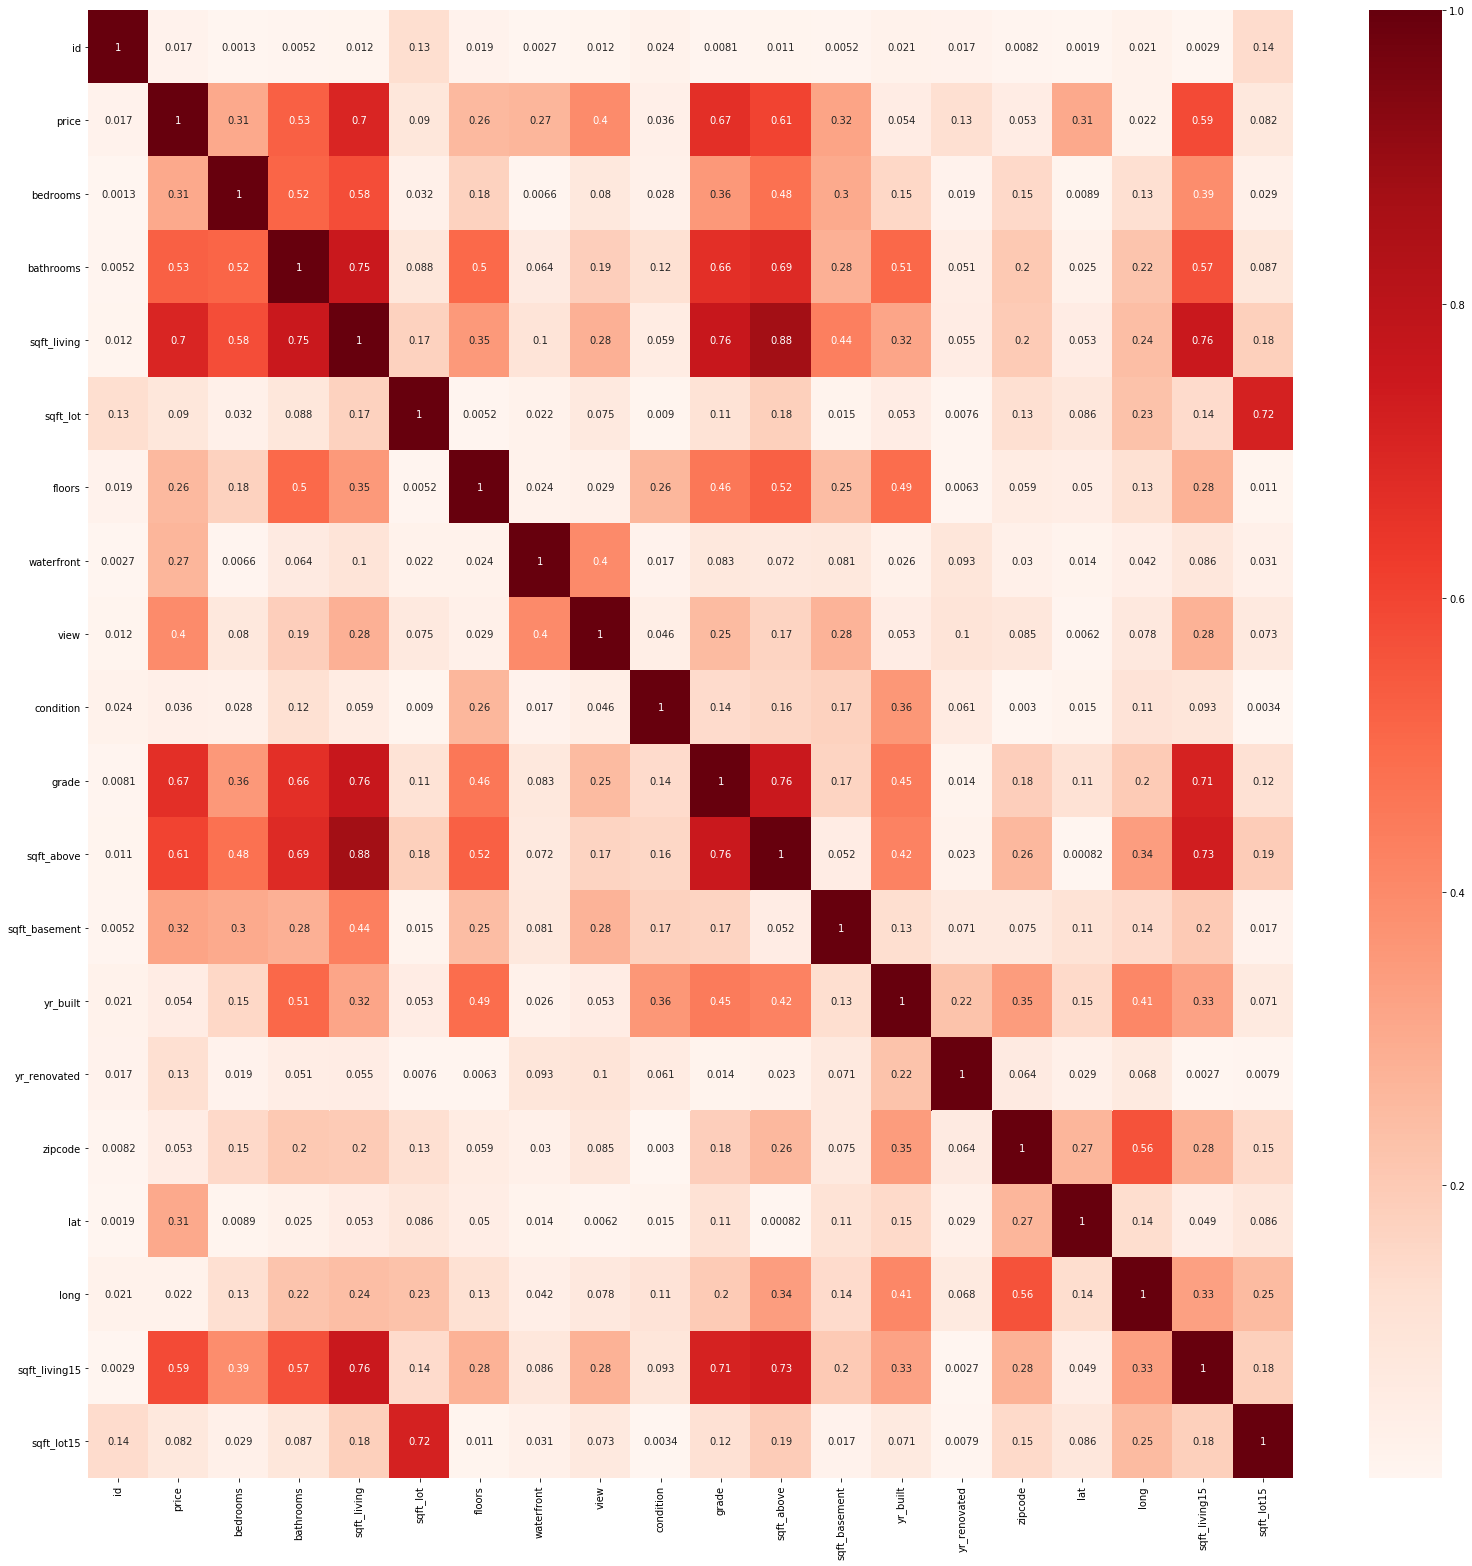

In [13]:
plt.figure(figsize=(27,27))
cor = abs(df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Alcune features ( ad esempio 'grade' e 'sqft_living') hanno una correlazione abbastanza elevate con la variabile target.
Si può inoltre osservare anche il grado di correlazione delle features tra di loro. Ad esempio tra sqft_living e sqft_above la correlazione risulta di 0.88.
Per comodità di lettura printo ora i valori di correlazione tra la variabile target 'price' e tutte le features del dataset.
           

In [14]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

CREATION MODEL

Assegno le features alla 'x' e la variabile target (trasformata in una logaritmica) alla 'y'.
Decido di esludere dalle features la colonna 'id' e la 'date'

In [15]:
y= np.log(df.price)
X=df.drop(['price','id', 'date'], axis=1)

Divido ora il dataset in test e training, usando per la fase di test il 35% del dataset totale

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=1)

Essendo la variabile target di tipo continuo, decido di utilizzare i modelli a regressione.

Utilizzo dalla libreria Sklearn il modello a regressione lineare

In [17]:
lr = linear_model.LinearRegression()

In [18]:
model = lr.fit(X_train, y_train)

Visualizzo ora i dati relativi all'R^2 sia per i dati di training che per quelli di test.
Il valore di questo dato mi permette di capire quanto il modello usato riesce a spiegare i dati, permettendomi di dare una valutazione del modello.
Inoltre, stampando il risultato sia sui dati di training che su quelli di test ho la possibilità di capire se il modello sta facendo Overfitting.


In [19]:
print("R^2 of train is: \n", model.score(X_train, y_train))
print("R^2 of test is: \n", model.score(X_test, y_test))

R^2 of train is: 
 0.7693254531808642
R^2 of test is: 
 0.7719205527797633


Dai risultati stampati posso notare che il modello creato non sta facendo Overfitting e che i risultati sembrano essere abbastanza soddisfacenti

Stampo anche il dato relativo al Mean Squared Error per avere un altro dato relativo alla bontà di adattamento del modello creato e printo graficamente la relazione tra i valori stimati e valori osservati.

In [20]:
predictions = model.predict(X_test)

In [21]:
print('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.06483937878700434


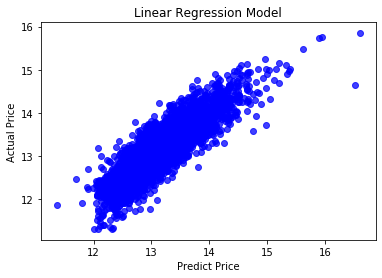

In [22]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75, color='b')
plt.xlabel('Predict Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

Se i valori stimati dal modello fossero identici a quelli veri, avremo che y=x in ogni punto.
In questo caso possiamo comunque vedere che l'andamento sembra quello di una retta passante per l'origine ( a parte qualche outliers) e quindi si avvicina al caso in cui y=x. 
Questo è dimostrato anche dal fatto che il valore di RMSE, che restituisce la distanza tra i valori stimati e quelli osservati, 
è risultato basso.

RIDGE REGULARIZATION:

Per provare a diminuire l'influenza delle features meno importanti utilizzo il metodo Ridge, un modello con penalizzazione dove aggiungiamo la somma al quadrato dei pesi alla nostra funzione.

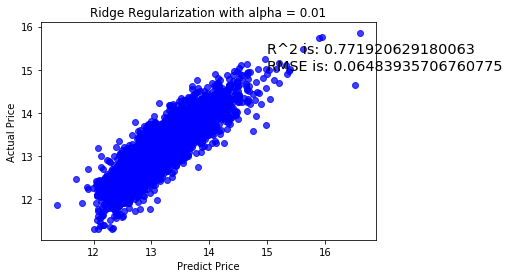

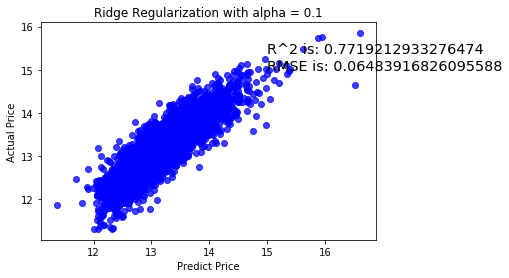

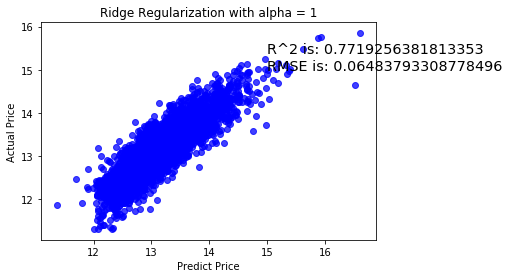

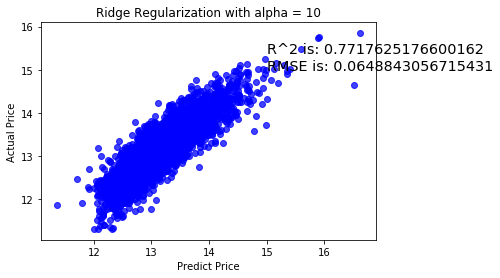

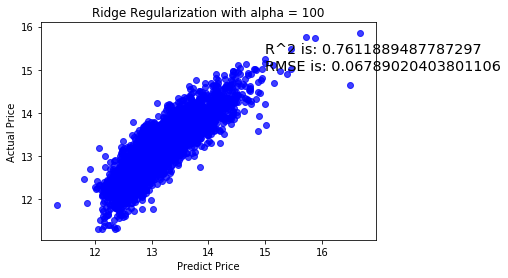

In [23]:
for i in range(-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha= alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color = 'b')
    plt.xlabel('Predict Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'. format(ridge_model.score(X_test, y_test), 
                                               mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay, xy=(15,15), size='x-large')
    plt.show()

Nonostante abbia provato a cambiare il valore di alpha i risultato del modello non cambia in maniera significativa rispetto al modello creato inizialmente.
I dati di R^2 e RMSE, infatti, sono molto simili rispetto al modello originale, anche al variare di alpha.

Provo ad utilizzare il metodo di regolarizzazione ElasticNet per vedere se notiamo cambiamenti


C:\Users\giacofa1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 554.3983410261151, tolerance: 0.38443687306835894
  positive)


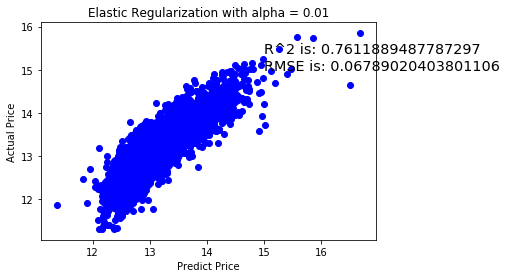

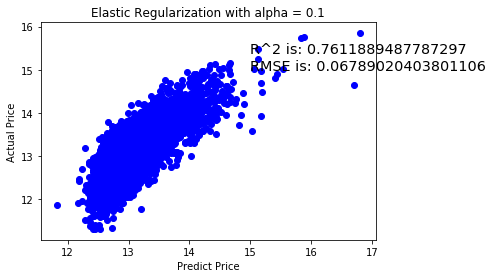

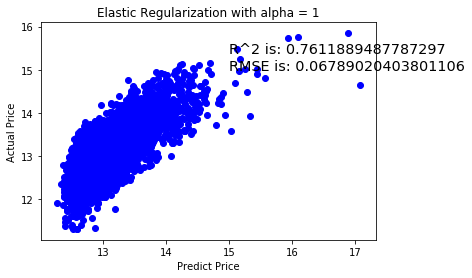

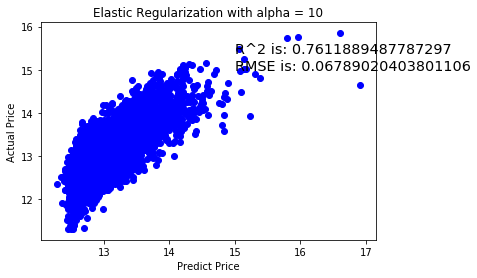

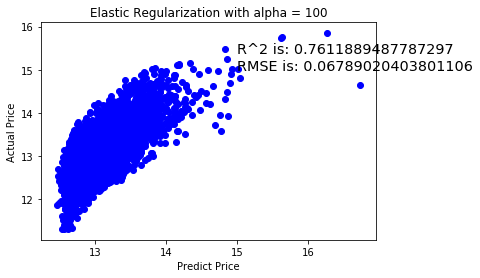

In [24]:
#ELASTICNET REGULARIZATION
for i in range(-2, 3):
    alpha = 10**i
    en = linear_model.ElasticNet(alpha= alpha, l1_ratio = 0.5)
    en_model = en.fit(X_train, y_train)
    preds_elastic = en_model.predict(X_test)
    
    plt.scatter(preds_elastic, actual_values, alpha=1, color = 'b')
    plt.xlabel('Predict Price')
    plt.ylabel('Actual Price')
    plt.title('Elastic Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'. format(ridge_model.score(X_test, y_test), 
                                               mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay, xy=(15,15), size='x-large')
    plt.show()


Anche con questo metodo non si notano differenze sostanziali.
Decido, quindi, di utilizzare il primo modello creato in quanto, rispetto agli altri, è il meno "complesso" con performance molto simili.

Assegno a "df_init" il nostro dataset originale, includendo anche le colonne
"id", "date" e la variabile target "price".

In [25]:
df_init = pd.DataFrame()
df_init['id']= df.id
df_init['date']= df.date

Assegno a "features" le variabili che abbiamo usato per creare il nostro modello

In [26]:
features = df.select_dtypes(include = [np.number]).drop(['id','price'], axis = 1).interpolate()

Assegno a "predictions" i risultati del nostro modello e riporto, utilizzando "final_pred", la variabile allo stato iniziale (per l'addestramento del modello era stata trasformata in una logaritmica)

In [27]:
predictions = model.predict(features)

In [28]:
final_pred = np.exp(predictions)

Printo il risultato del modello

In [29]:
print("Original predictions are: \n", predictions[:10], "\n")
print("Final Predictions are: \n", final_pred[:10])

Original predictions are: 
 [12.52165623 13.35144344 12.92765    12.92837428 12.9332044  14.43566952
 12.54452949 12.39388879 12.67270001 12.59020023] 

Final Predictions are: 
 [ 274211.84083112  628721.35264653  411535.26876692  411833.44056487
  413827.45762914 1859223.56725497  280556.24279239  241322.33087246
  318921.41745802  293666.55313202]


Vado ad inserire i valori di "final_pred" all'interno del nuovo dataset e stampo per ogni "id" e "date" i risultati del modello costruito in un file .csv

In [30]:
df_init['price']= final_pred
print(df_init.head())

           id       date          price
0  7129300520 2014-10-13  274211.840831
1  6414100192 2014-12-09  628721.352647
2  5631500400 2015-02-25  411535.268767
3  2487200875 2014-12-09  411833.440565
4  1954400510 2015-02-18  413827.457629


In [31]:
df_init.to_csv('results1.csv', index=False)

FINE